# ## DIAGNOSTIC REPONSES RATING / SUPERIEUR OU EGALE A 4"

### Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import spacy




In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving redoute_v31.csv to redoute_v31.csv
User uploaded file "redoute_v31.csv" with length 2858630 bytes


### Import review data of La Redoute

In [3]:
file = "redoute_v31.csv"
df = pd.read_csv(file, sep =",", index_col = 0)

In [7]:
display(df.shape)

(5806, 5)

In [9]:
df.head()

,rating,comment,createdAt,SupplierReply,SupplierReplyDate
id,,,,,
rev-0134d691-cf06-4caa-8d42-528cea655fa2,4,"Une livraison assez rapide, les tailles sont b...",2023-10-06 18:09:56,"Bonjour, merci pour vos encouragements. Vos re...",2023-10-13 09:56:10
rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817,4,Juste vous dire que la qualité est inférieure ...,2023-10-05 14:37:16,"Bonjour, merci d'avoir pris le temps de nous p...",2023-10-12 10:01:19
rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8,4,Vendeur et vendeuse au top dans le magasin Gal...,2023-10-04 14:38:55,"Bonjour, merci de nous partager votre expérien...",2023-10-11 12:42:01
rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4,4,M'ayant été signalé que mon colis ne pouvait ê...,2023-09-23 08:12:33,"Bonjour, merci d'avoir pris le temps de partag...",2023-10-09 13:43:27
rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2,4,J'apprécie la redoute pour sa fiabilité et son...,2023-10-09 20:25:34,"Bonjour, merci d'avoir pris le temps de nous p...",2023-10-16 12:03:29


**Analyse des Réponses pour les Ratings de 4 ou Plus**

Extraction de donnees pour les lignes où le rating est supérieur ou égal à 4

In [10]:
 # Filtrer les lignes où le rating est supérieur ou égal à 4
df_ratings_4_plus = df[df['rating'] >= 4]

In [11]:
df.head()

,rating,comment,createdAt,SupplierReply,SupplierReplyDate
id,,,,,
rev-0134d691-cf06-4caa-8d42-528cea655fa2,4,"Une livraison assez rapide, les tailles sont b...",2023-10-06 18:09:56,"Bonjour, merci pour vos encouragements. Vos re...",2023-10-13 09:56:10
rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817,4,Juste vous dire que la qualité est inférieure ...,2023-10-05 14:37:16,"Bonjour, merci d'avoir pris le temps de nous p...",2023-10-12 10:01:19
rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8,4,Vendeur et vendeuse au top dans le magasin Gal...,2023-10-04 14:38:55,"Bonjour, merci de nous partager votre expérien...",2023-10-11 12:42:01
rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4,4,M'ayant été signalé que mon colis ne pouvait ê...,2023-09-23 08:12:33,"Bonjour, merci d'avoir pris le temps de partag...",2023-10-09 13:43:27
rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2,4,J'apprécie la redoute pour sa fiabilité et son...,2023-10-09 20:25:34,"Bonjour, merci d'avoir pris le temps de nous p...",2023-10-16 12:03:29


Nettoyage de Texte

In [16]:
import string

# Définition de l'option d'affichage pour afficher toutes les lignes
#pd.set_option('display.max_colwidth', None)

# Fonction pour nettoyer le texte
def nettoyer_texte(texte):
    # Enlever la ponctuation
    texte_sans_ponctuation = texte.translate(str.maketrans('', '', string.punctuation))

    # Convertir le texte en minuscules
    texte_minuscules = texte_sans_ponctuation.lower()

    # Enlever les chiffres (si nécessaire)
    texte_sans_chiffres = ''.join([i for i in texte_minuscules if not i.isdigit()])

    return texte_sans_chiffres

# Appliquer la fonction de nettoyage à la colonne 'SupplierReply'
df_ratings_4_plus['SupplierReply_Cleaned'] = df_ratings_4_plus['SupplierReply'].apply(nettoyer_texte)

# Afficher les résultats
print(df_ratings_4_plus.iloc[:10])


                                          rating  \
id                                                 
rev-0134d691-cf06-4caa-8d42-528cea655fa2       4   
rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817       4   
rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8       4   
rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4       4   
rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2       4   
rev-e3e0c70f-ba7d-4ab1-856c-fab521200c1b       4   
rev-3d66e3f3-e22c-4e3c-a236-12e97f9b3dfe       4   
rev-79de8ba5-6963-4095-bbcf-655e22e6ed67       4   
rev-217b0185-fcf2-4ef8-8851-7a049f77f164       4   
rev-711159db-8cf0-445d-b959-17aa34f5da92       4   

                                                                                                                                                                                                                                                                                                                                      comment  \
id                                    

<ipython-input-16-d89fee990d93>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_4_plus['SupplierReply_Cleaned'] = df_ratings_4_plus['SupplierReply'].apply(nettoyer_texte)


Création d’un WordCloud

In [17]:
!pip install wordcloud

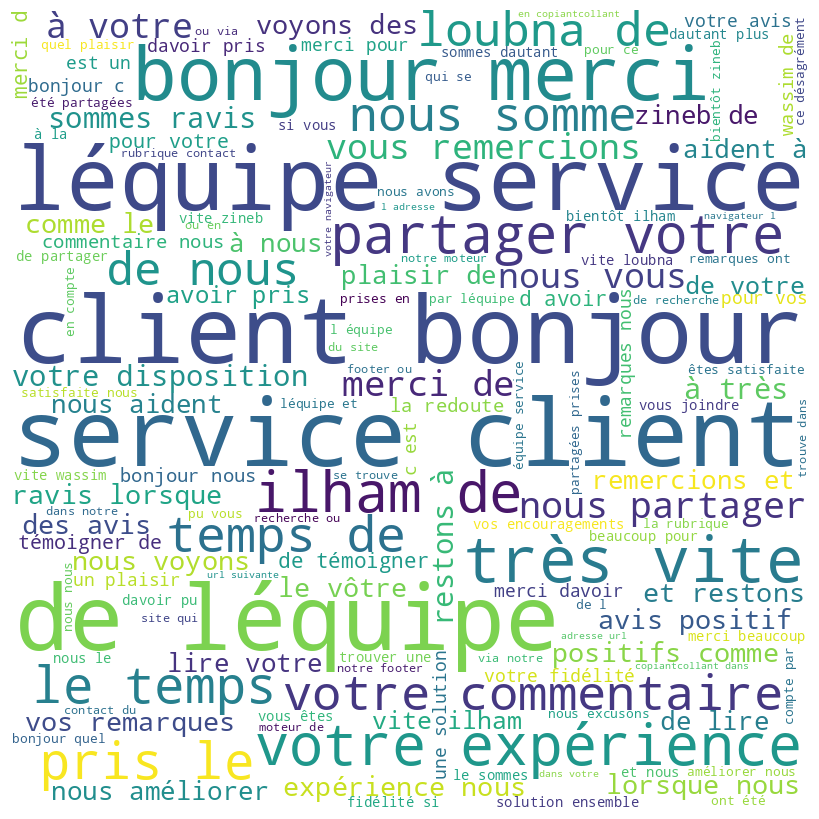

In [18]:
from wordcloud import WordCloud



# Concaténation de tous les textes nettoyés dans une seule chaîne
texte_concatene = ' '.join(df_ratings_4_plus['SupplierReply_Cleaned'])

# Création du WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texte_concatene)

# Affichage du WordCloud généré
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


Identification et Suppression des Stop Words

In [19]:
stop_words = [
    'bonjour', 'merci', 'de', 'nous', 'vous', 'votre', 'pour', 'la', 'le', 'et', 'à', 'nos', 'des',
    'en', 'par', 'davoir', 'dans', 'un', 'une', 'sur', 'avec', 'cette', 'que', 'qui', 'plus',
    'sommes', 'notre', 'sont', 'être', 'ou', 'si', 'ils', 'les', 'comme', 'au', 'avoir', 'ce',
    'cet', 'cette', 'ces', 'mais', 'aussi', 'donc', 'lorsque', 'puis', 'car', 'tous', 'tout',
    'très', 'fait', 'faire', 'sans', 'chez', 'toujours', 'jamais', 'peut', 'peuvent', 'aussi',
    'client', 'service', 'équipe', 'ilham', 'temps', 'partager', 'avis', 'expérience', 'pris', 'prendre'
]


2eme WordCloud

In [20]:
wordcloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='white').generate(texte_concatene)


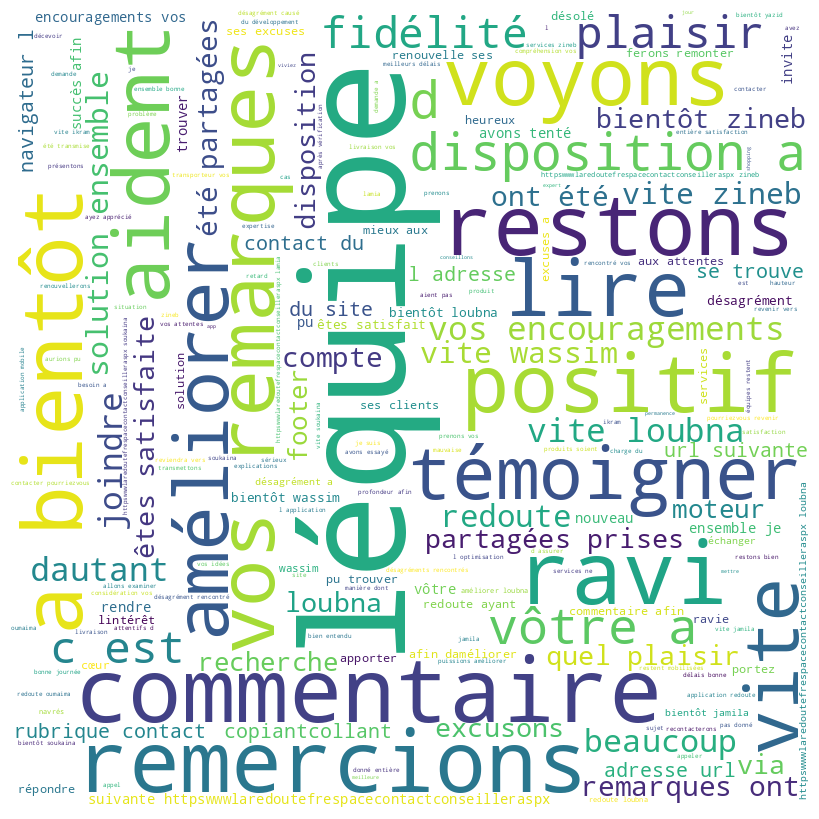

In [21]:
# Affichage du WordCloud généré
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



3eme WordCloud

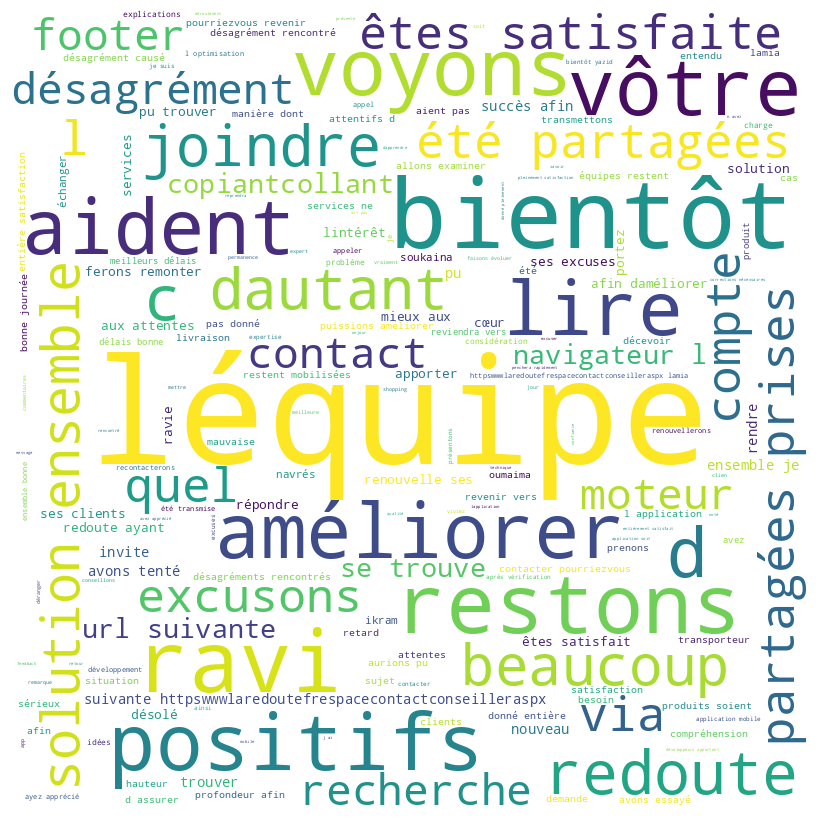

In [23]:

# Liste étendue des stop words
stop_words_etendus = [
    'bonjour', 'merci', 'de', 'nous', 'vous', 'votre', 'pour', 'la', 'le', 'et', 'à', 'nos', 'des',
    'en', 'par', 'davoir', 'dans', 'un', 'une', 'sur', 'avec', 'cette', 'que', 'qui', 'plus',
    'sommes', 'notre', 'sont', 'être', 'ou', 'si', 'ils', 'les', 'comme', 'au', 'avoir', 'ce',
    'cet', 'cette', 'ces', 'mais', 'aussi', 'donc', 'lorsque', 'puis', 'car', 'tous', 'tout',
    'très', 'fait', 'faire', 'sans', 'chez', 'toujours', 'jamais', 'peut', 'peuvent', 'aussi',
    'client', 'service', 'équipe', 'ilham', 'temps', 'partager', 'avis', 'expérience', 'pris', 'prendre'
    'à', 'de', 'du', 'la', 'le', 'nous', 'vos', 'votre', 'vous', 'et', 'a', 'des', 'en', 'les',
    'un', 'une', 'ont', 'être', 'est', 'pour', 'qui', 'que', 'dans', 'cette', 'vite', 'tout',
    'toute', 'plus', 'si', 'aussi', 'bien', 'comme', 'sans', 'sur', 'ça', 'ont', 'disposition',
    'témoigner', 'commentaire', 'remarques', 'fidélité', 'adresse', 'rubrique', 'remercions',
    'partages', 'site', 'loubna', 'wassim', 'jamila', 'zineb', 'encouragements', 'positif',
    'resterons', 'rester', 'satisfaites', 'satisfaire', 'heureux', 'plaisir', 'client', 'service',
    'équipe', 'ilham', 'temps', 'partager', 'avis', 'expérience', 'pris', 'prendre'
]



# Création du WordCloud avec la liste des stop words étendue
wordcloud = WordCloud(stopwords=stop_words_etendus, width=800, height=800, background_color='white').generate(texte_concatene)

# Affichage du WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


WordCloud final

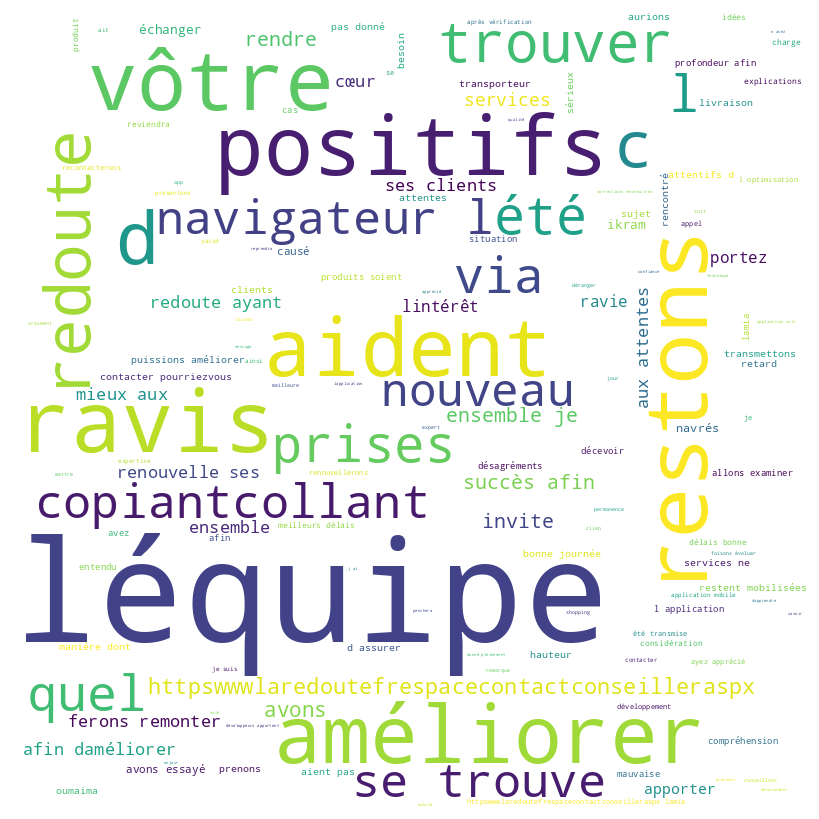

In [24]:
stop_words_supplementaires = [
    'footer', 'désagrément', 'êtes', 'satisfaite', 'voyons', 'partagées', 'bientôt',
    'aiden', 'resterons', 'contact', 'équip', 'navi', 'gateur', 'navig', 'ateur',
    'compte', 'url', 'suivante', 'ravi', 'beaucoup', 'remercions', 'excusons',
    'lire', 'dautant', 'joindre', 'copiant', 'collant', 'amélior', 'ée', 'améliore',
    'souhaitons', 'souhaite', 'encore', 'adresse', 'contact', 'nous', 'répondre',
    'rencontrés', 'invitons', 'souhaiterions', 'tenté', 'appeler', 'pu', 'moteur',
    'recherche', 'revenir', 'vers', 'jamila', 'wassim', 'soukaina', 'zineb', 'entière',
    'satisfaction', 'attendre', 'aide', 'prochain', 'prochaine', 'tente', 'souhaite',
    'navi', 'gateur', 'essayer', 'rester', 'aider', 'entier', 'entière', 'satisfaire',
    'rester', 'entière', 'entièrement', 'écout', 'équipe', 'équipes', 'proposition',
    'proposer', 'vite', 'rapide', 'rapidement', 'prochainement', 'tenter', 'essayer',
    'atteindre', 'atteint', 'atteints', 'atteinte', 'atteintes', 'déçu', 'déçue',
    'déçus', 'déçues', 'heureux', 'heureuse', 'heureuses', 'content', 'contente',
    'contents', 'contentes', 'satisfait', 'satisfaits', 'satisfaite', 'satisfaites',
    'insatisfait', 'insatisfaite', 'insatisfaits', 'insatisfaites', 'excuse', 'excuses',
    'excusons', 'excuser', 'désolé', 'désolée', 'désolés', 'désolées', 'regret', 'regrets',
    'regrette', 'regretter', 'regretté', 'regrettée', 'regrettés', 'regrettées', 'souci',
    'soucis', 'préoccupation', 'préoccupations', 'inquiétude', 'inquiétudes', 'problème',
    'problèmes', 'problématique', 'problématiques', 'question', 'questions', 'demande',
    'demandes', 'requête', 'requêtes', 'réponse', 'réponses', 'solution', 'solutions',
    'résolution', 'résolutions', 'solliciter', 'sollicité', 'sollicitée', 'sollicités',
    'sollicitées', 'suggestion', 'suggestions', 'conseil', 'conseils', 'recommandation',
    'recommandations', 'avis', 'opinion', 'opinions', 'feedback', 'feedbacks', 'retour',
    'retours', 'critique', 'critiques', 'évaluation', 'évaluations', 'appréciation',
    'appréciations', 'commentaire', 'commentaires'
]

# Mise à jour la liste des stop words en les combinant avec la liste supplémentaire
stop_words_etendus += stop_words_supplementaires

# À présent, vous pouvez utiliser `stop_words_etendus` pour générer un nouveau WordCloud
wordcloud = WordCloud(stopwords=stop_words_etendus, width=800, height=800, background_color='white').generate(texte_concatene)

# Affichage du WordCloud mis à jour
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


L'analyse de ce WordCloud nous donne une indication initiale sur la nature du texte analysé. Ce dernier semble etre generique, nous allons completer cette derniere par quelques analyses supplementaires

Analyse de Fréquence des Mots

In [25]:
from collections import Counter

# Concaténer toutes les réponses en une seule chaîne de texte
#texte_concatene = ' '.join(df['SupplierReply_Cleaned'])

# Tokenisation du texte
mots = texte_concatene.split()

# Comptage de la fréquence de chaque mot
frequence_mots = Counter(mots)

# Convertion du  compteur en DataFrame pour une meilleure lisibilité
df_frequence_mots = pd.DataFrame(frequence_mots.items(), columns=['Mot', 'Fréquence']).sort_values(by='Fréquence', ascending=False)

# Afficher les mots les plus fréquents
print(df_frequence_mots.head(20))


           Mot  Fréquence
28          de       5018
15        nous       3830
22       votre       2586
29     service       2354
13     léquipe       2323
30      client       2315
0      bonjour       2312
17           à       1913
1        merci       1611
19        vous       1522
33          le       1398
25        très       1127
24           a       1108
26        vite       1024
2         pour        944
60      sommes        905
14          et        841
59  expérience        835
27       ilham        784
35    partager        727


Analyse de Co-occurrence

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


# Utiliser CountVectorizer pour créer une matrice de termes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_ratings_4_plus['SupplierReply_Cleaned'])

# Convertion de la matrice de termes en array numpy
Xc = (X.T * X)  # Ceci est la matrice de co-occurrence
Xc.setdiag(0)  # Remplacer la diagonale par 0s

# Créer un DataFrame à partir de la matrice de co-occurrence
noms_mots = vectorizer.get_feature_names_out()
df_co_occurrence = pd.DataFrame(data=Xc.toarray(), index=noms_mots, columns=noms_mots)

# Afficher la matrice de co-occurrence pour les 20 premiers mots
print(df_co_occurrence.iloc[:20, :20])


             accueillir  adresse  afin  agréable  ai  aident  aient  ainsi  \
accueillir            0        0     0         0   0       0      0      0   
adresse               0        0   109         0   0       0      0      0   
afin                  0      109     0         0   0       0      1      0   
agréable              0        0     0         0   0       0      0      0   
ai                    0        0     0         0   0       3      0      0   
aident                0        0     0         0   3       0      4      0   
aient                 0        0     1         0   0       4      0      0   
ainsi                 0        0     0         0   0       0      0      0   
ait                   0        0     2         0   0       1      0      0   
alerte                0        0     1         0   0       0      0      0   
allons                0        0    14         0   0       0      0      0   
améliorer             0        0    18         0   3     419    

Analyse des Bigrammes/Trigrammes

In [27]:
from nltk import bigrams, trigrams, FreqDist

# Créer des listes de bigrammes et trigrammes
bigramme_liste = list(bigrams(mots))
trigramme_liste = list(trigrams(mots))

# Calculer la fréquence des bigrammes et trigrammes
bigramme_freq = FreqDist(bigramme_liste)
trigramme_freq = FreqDist(trigramme_liste)

# Afficher les bigrammes les plus courants
print(bigramme_freq.most_common(20))

# Afficher les trigrammes les plus courants
print(trigramme_freq.most_common(20))


[(('service', 'client'), 2314), (('client', 'bonjour'), 2294), (('de', 'léquipe'), 2167), (('léquipe', 'service'), 2166), (('bonjour', 'merci'), 1477), (('très', 'vite'), 1024), (('votre', 'expérience'), 821), (('ilham', 'de'), 784), (('partager', 'votre'), 726), (('pris', 'le'), 632), (('le', 'temps'), 632), (('temps', 'de'), 632), (('a', 'très'), 627), (('votre', 'commentaire'), 606), (('nous', 'sommes'), 587), (('loubna', 'de'), 575), (('de', 'nous'), 559), (('nous', 'partager'), 556), (('merci', 'de'), 525), (('nous', 'vous'), 501)]
[(('service', 'client', 'bonjour'), 2293), (('de', 'léquipe', 'service'), 2165), (('léquipe', 'service', 'client'), 2162), (('client', 'bonjour', 'merci'), 1465), (('ilham', 'de', 'léquipe'), 767), (('pris', 'le', 'temps'), 632), (('le', 'temps', 'de'), 632), (('a', 'très', 'vite'), 579), (('de', 'nous', 'partager'), 556), (('nous', 'partager', 'votre'), 556), (('loubna', 'de', 'léquipe'), 529), (('bonjour', 'merci', 'de'), 525), (('nous', 'vous', 'reme

Diversité Lexicale

In [29]:
# Nombre total de mots
total_mots = len(mots)

# Nombre de mots uniques
mots_uniques = len(set(mots))

# Calcul de la diversité lexicale
diversite_lexicale = mots_uniques / total_mots

print(f"Diversité Lexicale: {diversite_lexicale}")


Diversité Lexicale: 0.006016525809796098


Classification et Clustering de Texte

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Transformer les données textuelles en TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_etendus)
tfidf = tfidf_vectorizer.fit_transform(df_ratings_4_plus['SupplierReply_Cleaned'])

# Définir le modèle K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf)

# Afficher les centres de cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(5):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}:")
    print(top_ten_words)


Cluster 0:
['redoute', 'trouver', 'ensemble', 'ses', 'afin', 'léquipe', 'nouveau', 'lintérêt', 'portez', 'renouvelle']
Cluster 1:
['léquipe', 'quel', 'œuvre', 'fluidité', 'faisons', 'ferons', 'fidélitévos', 'financier', 'grand', 'expertise']
Cluster 2:
['positifs', 'vôtre', 'ravis', 'léquipe', 'oumaima', 'yazid', 'lamia', 'ikram', 'restons', 'aident']
Cluster 3:
['aident', 'améliorer', 'léquipe', 'prises', 'été', 'restons', 'causé', 'transporteur', 'rencontré', 'retard']
Cluster 4:
['restons', 'léquipe', 'quel', 'redoute', 'ikram', 'œuvre', 'financier', 'faisons', 'ferons', 'fidélitévos']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Analyse de Sentiment simple "TextBlob"

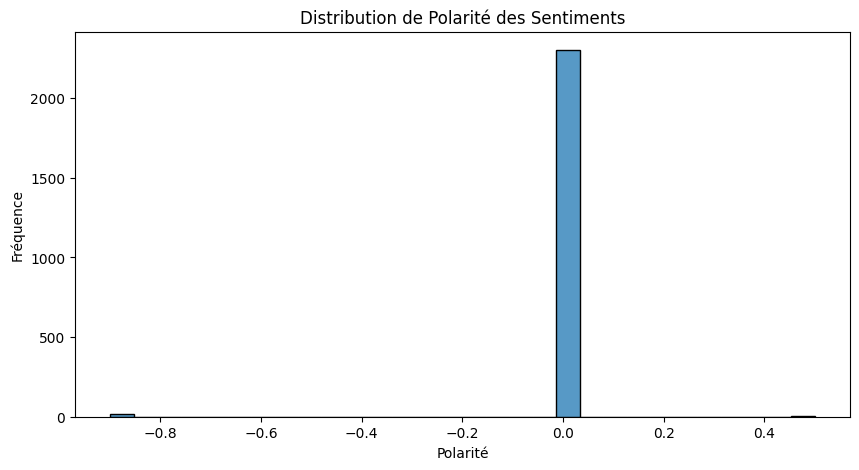

In [31]:
from textblob import TextBlob

# Ajouter une colonne pour le sentiment
df['Polarity'] = df_ratings_4_plus['SupplierReply_Cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Visualiser la distribution du sentiment
plt.figure(figsize=(10, 5))
sns.histplot(df['Polarity'], bins=30, kde=False)
plt.title('Distribution de Polarité des Sentiments')
plt.xlabel('Polarité')
plt.ylabel('Fréquence')
plt.show()
